In [389]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

import warnings
warnings.simplefilter('ignore')

In [390]:
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Define the stock symbol and date range
ticker = "INFY.NS"
start_date = datetime(2015, 6, 7)
end_date = datetime(2023, 6, 7)

# Download historical stock price data
data = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [391]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1976 entries, 2015-06-08 to 2023-06-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1976 non-null   float64
 1   High       1976 non-null   float64
 2   Low        1976 non-null   float64
 3   Close      1976 non-null   float64
 4   Adj Close  1976 non-null   float64
 5   Volume     1976 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 108.1 KB


In [392]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1.976000e+03
mean,916.184223,925.483420,906.360204,915.795870,836.738730,8.237636e+06
std,444.260294,447.890103,440.057400,443.980903,450.567146,7.099881e+06
min,440.000000,443.799988,430.000000,436.700012,369.555786,4.834070e+05
25%,551.831253,562.362518,546.512482,552.756271,451.719025,5.121149e+06
50%,716.225006,723.725006,709.274994,716.474976,638.518433,6.724818e+06
75%,1357.887482,1373.262543,1345.112488,1357.449982,1280.017944,9.123240e+06
max,1938.550049,1953.900024,1930.500000,1939.500000,1848.383057,1.644050e+08


In [393]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-06-08,505.000000,506.162506,496.750000,500.012512,397.831696,6141048
2015-06-09,500.937500,501.912506,495.750000,498.024994,396.250336,7561740
2015-06-10,497.500000,509.837494,496.250000,506.625000,403.092896,6385840
2015-06-11,508.987488,511.187500,498.762512,499.412506,397.354279,9229464
2015-06-12,501.250000,506.387512,488.875000,493.762512,392.858978,9852924


# Keltner channel


In [394]:
ema=data["EMA"] = data["Close"].ewm(span=20, adjust=False).mean()


In [395]:
def calculate_atr(data, window=20):
    data["High-Low"] = data["High"] - data["Low"]
    data["High-PrevClose"] = abs(data["High"] - data["Close"].shift(1))
    data["Low-PrevClose"] = abs(data["Low"] - data["Close"].shift(1))
    data["True Range"] = data[["High-Low", "High-PrevClose", "Low-PrevClose"]].max(axis=1)
    data["ATR"] = data["True Range"].rolling(window=window).mean()
    data.drop(["High-Low", "High-PrevClose", "Low-PrevClose", "True Range"], axis=1, inplace=True)
    data.dropna(inplace=True)
    return data

atr_data = calculate_atr(data)

In [396]:
data

,Open,High,Low,Close,Adj Close,Volume,EMA,ATR
Date,,,,,,,,
2015-07-03,494.000000,496.500000,491.000000,495.149994,399.936371,2695306,498.019450,10.825002
2015-07-06,492.500000,494.000000,487.500000,491.649994,397.109528,4305602,497.412835,10.736876
2015-07-07,492.500000,495.000000,489.500000,490.250000,395.978699,3497418,496.730660,10.703751
2015-07-08,489.500000,489.500000,477.399994,478.750000,386.690094,7024178,495.018216,10.666876
2015-07-09,478.750000,483.000000,467.024994,469.000000,378.814880,8587772,492.540291,10.844377
...,...,...,...,...,...,...,...,...
2023-05-31,1319.849976,1331.099976,1314.150024,1318.300049,1283.547974,17800782,1292.887469,19.145007
2023-06-01,1322.550049,1329.500000,1318.099976,1319.500000,1302.000000,4277841,1295.421996,19.050006
2023-06-02,1309.000000,1312.900024,1296.050049,1299.000000,1299.000000,10909311,1295.762758,18.985004


In [397]:
#calculating keltner channel
multiplier=2
upper_channel=data["UPPER CHANNEL"]= ema + (multiplier*data["ATR"])
lower_channel=data["LOWER CHANNEL"]= ema - (multiplier*data["ATR"])




In [398]:
data

,Open,High,Low,Close,Adj Close,Volume,EMA,ATR,UPPER CHANNEL,LOWER CHANNEL
Date,,,,,,,,,,
2015-07-03,494.000000,496.500000,491.000000,495.149994,399.936371,2695306,498.019450,10.825002,519.669453,476.369447
2015-07-06,492.500000,494.000000,487.500000,491.649994,397.109528,4305602,497.412835,10.736876,518.886587,475.939083
2015-07-07,492.500000,495.000000,489.500000,490.250000,395.978699,3497418,496.730660,10.703751,518.138161,475.323159
2015-07-08,489.500000,489.500000,477.399994,478.750000,386.690094,7024178,495.018216,10.666876,516.351969,473.684464
2015-07-09,478.750000,483.000000,467.024994,469.000000,378.814880,8587772,492.540291,10.844377,514.229045,470.851537
...,...,...,...,...,...,...,...,...,...,...
2023-05-31,1319.849976,1331.099976,1314.150024,1318.300049,1283.547974,17800782,1292.887469,19.145007,1331.177484,1254.597455
2023-06-01,1322.550049,1329.500000,1318.099976,1319.500000,1302.000000,4277841,1295.421996,19.050006,1333.522008,1257.321984
2023-06-02,1309.000000,1312.900024,1296.050049,1299.000000,1299.000000,10909311,1295.762758,18.985004,1333.732766,1257.792751


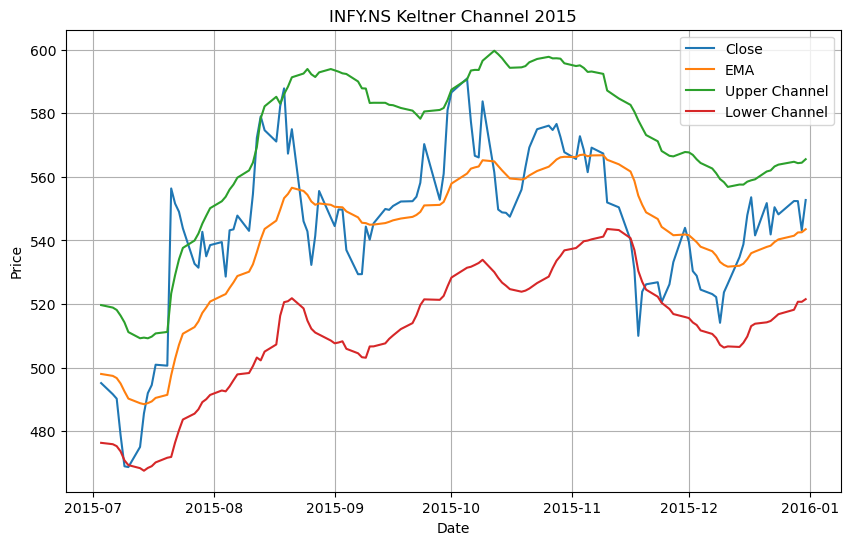

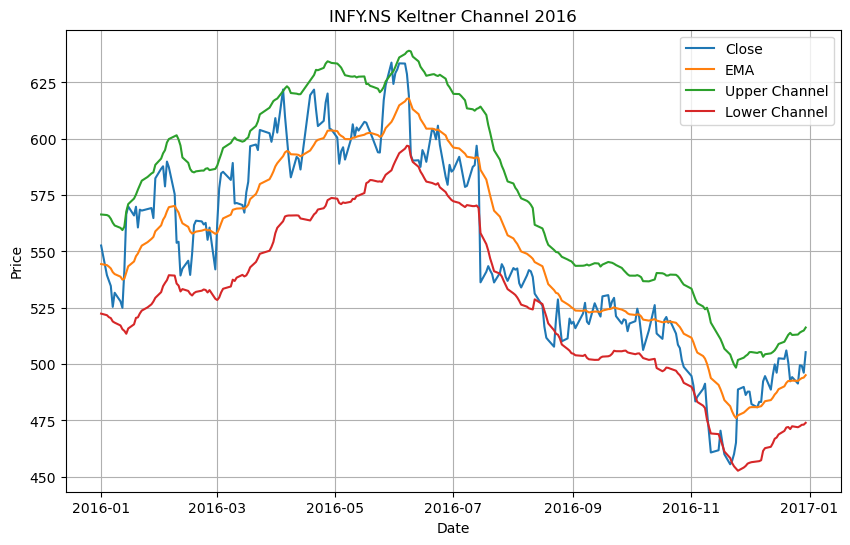

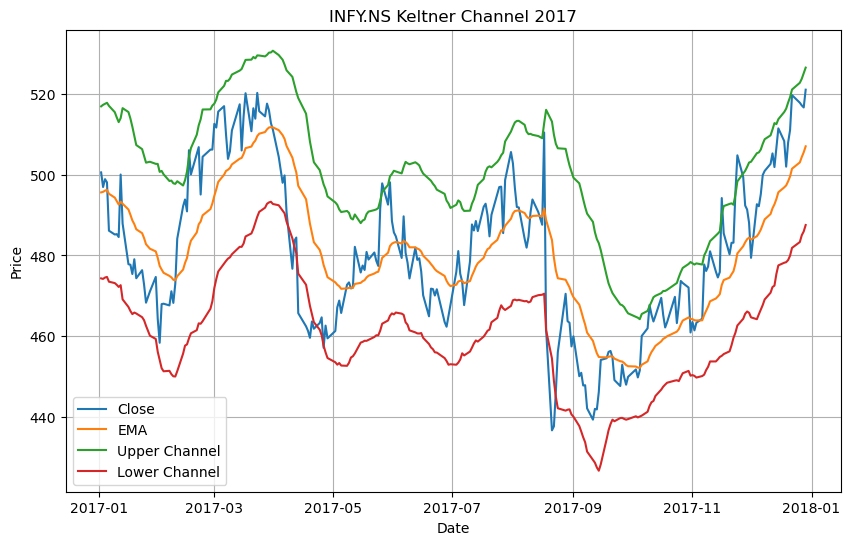

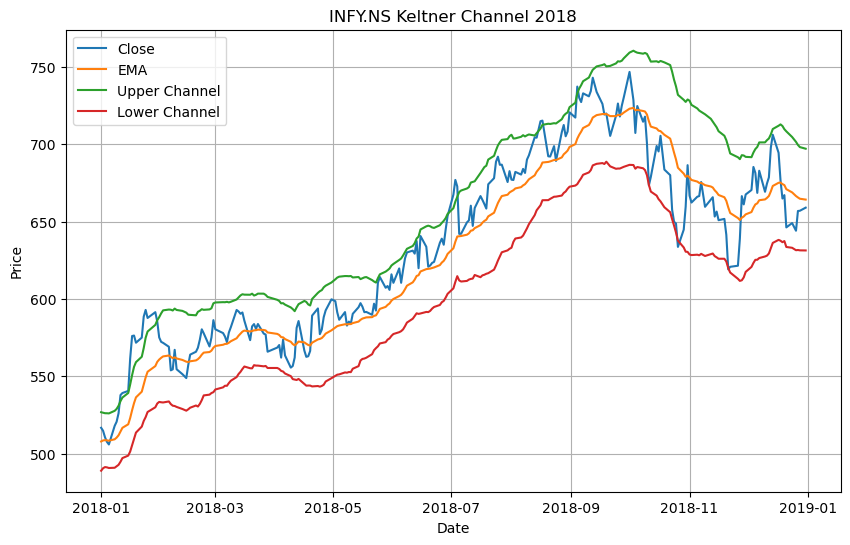

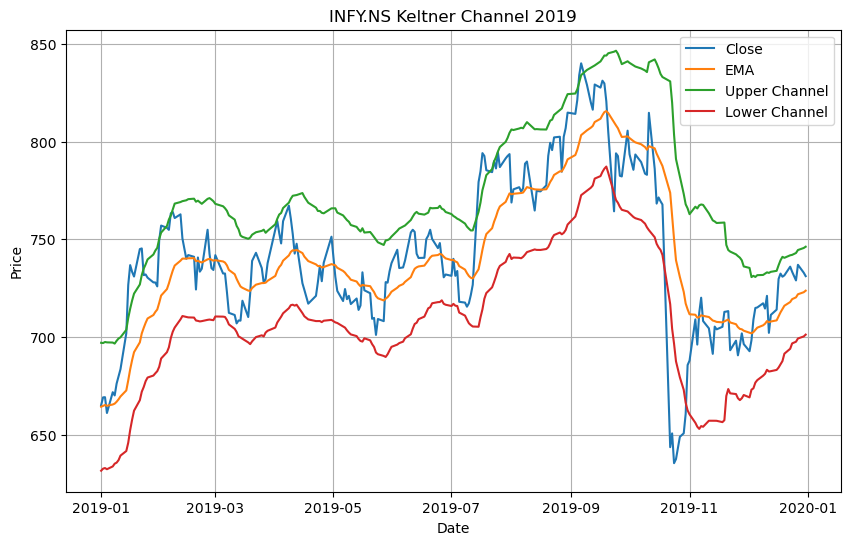

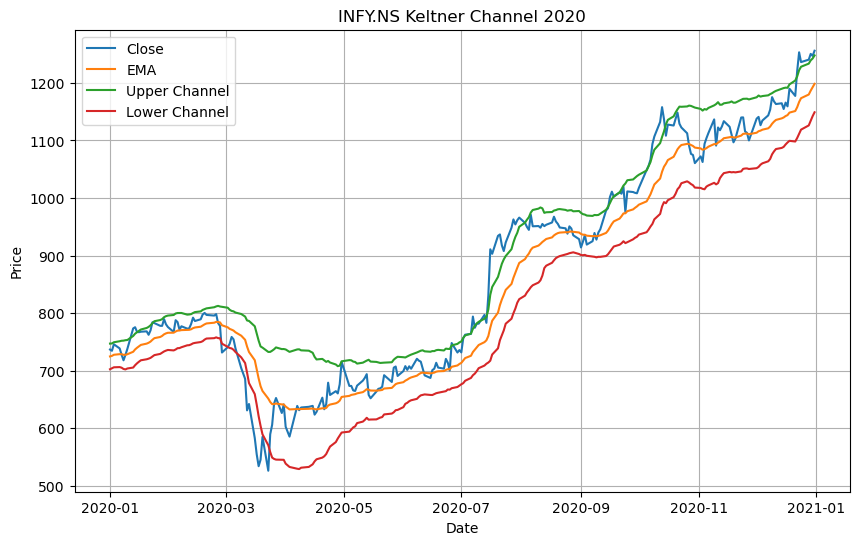

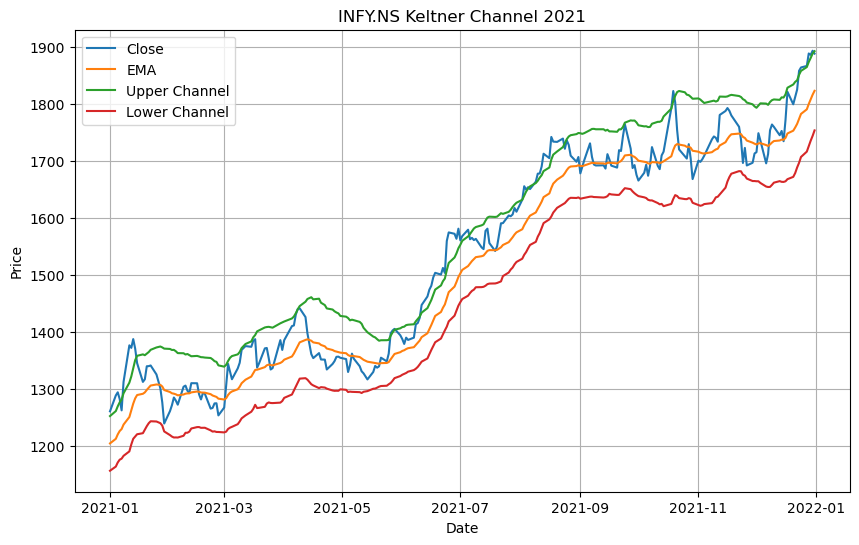

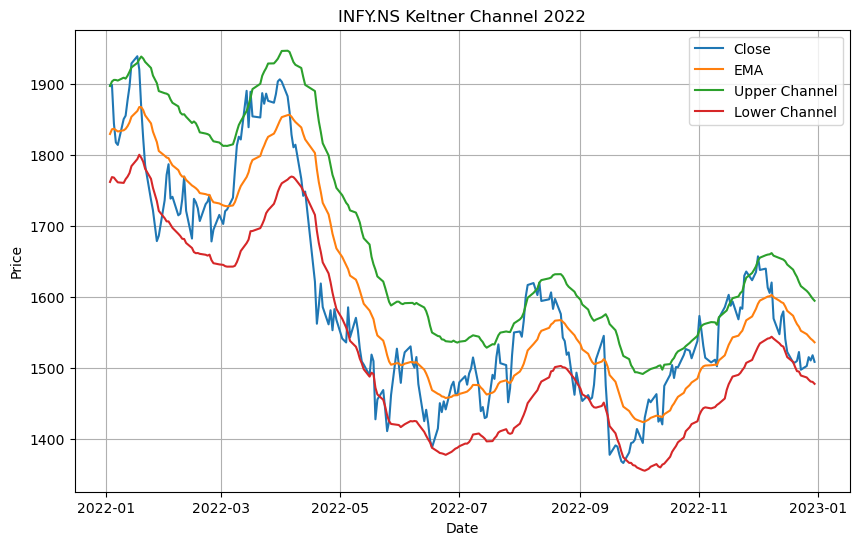

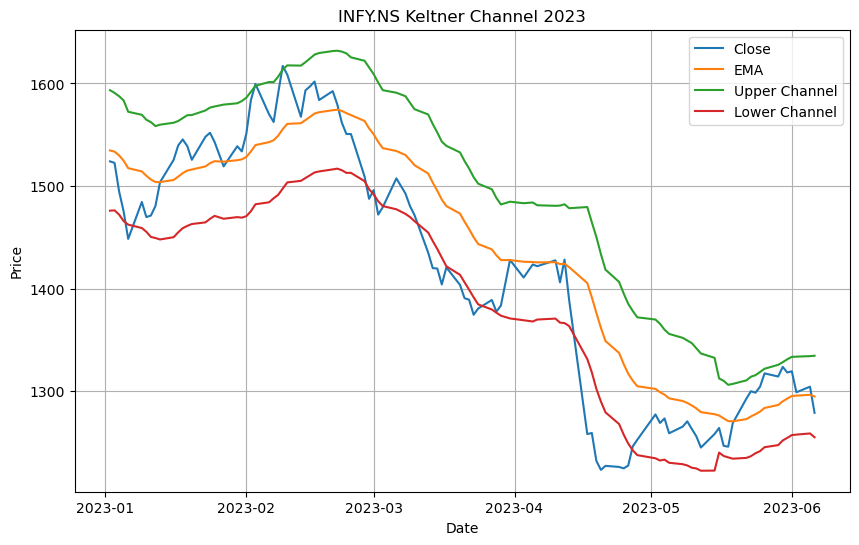

In [414]:
for year in range(start_date.year, end_date.year + 1):
    
    # Filter data for the current year
    year_data = data[data.index.year == year]
    




    plt.figure(figsize=(10, 6))
    plt.plot(year_data.index, year_data["Close"], label="Close")
    plt.plot(year_data.index, year_data["EMA"], label="EMA")
    plt.plot(year_data.index, year_data["UPPER CHANNEL"], label="Upper Channel")
    plt.plot(year_data.index, year_data["LOWER CHANNEL"], label="Lower Channel")

    plt.title(f"{ticker} Keltner Channel {year}")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.grid(True)
    plt.legend()
    plt.show()



sell_signals = data[data['Close'] > data["UPPER CHANNEL"]]['Close']
buy_signals = data[data['Close'] < data["LOWER CHANNEL"]]['Close']

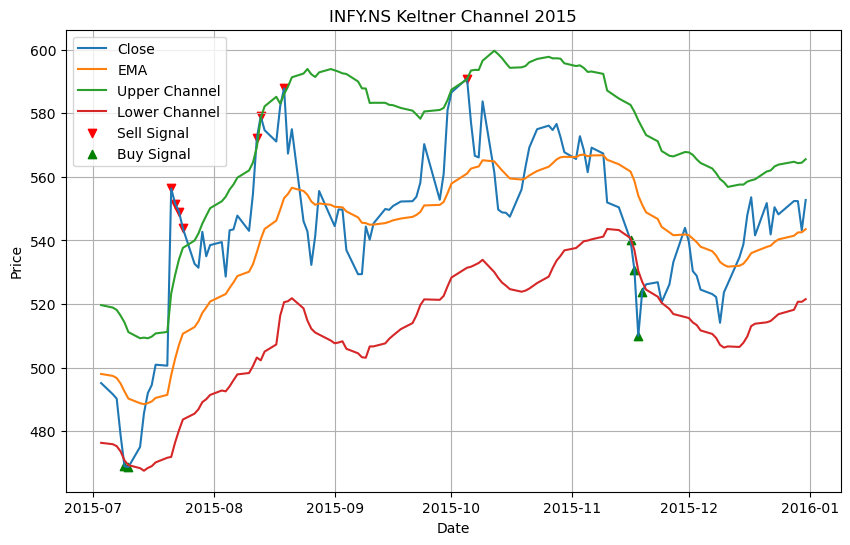

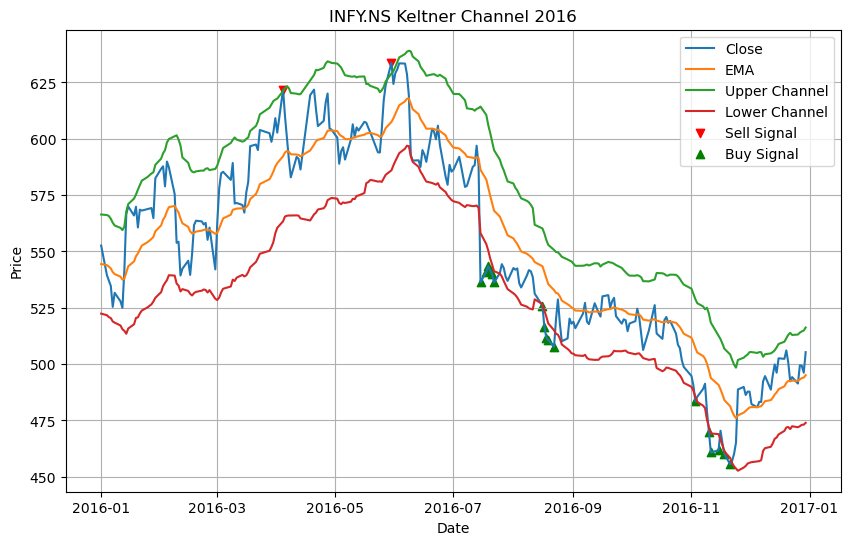

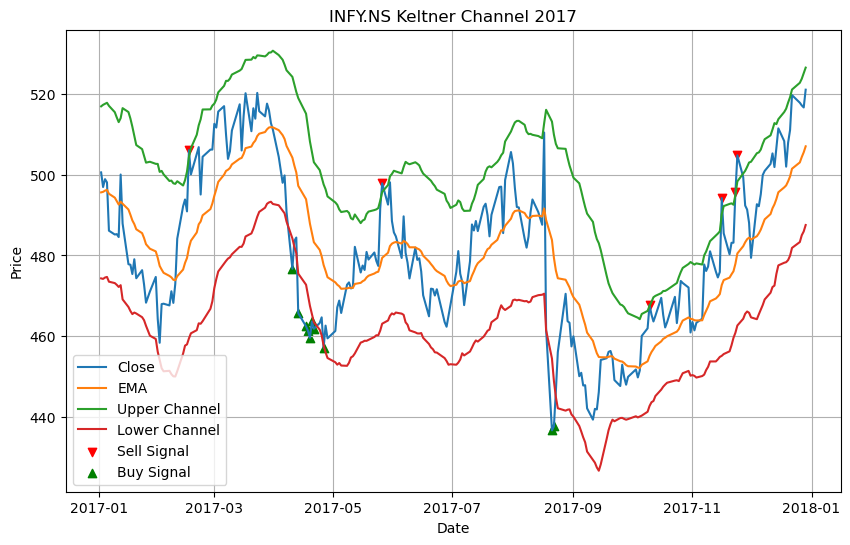

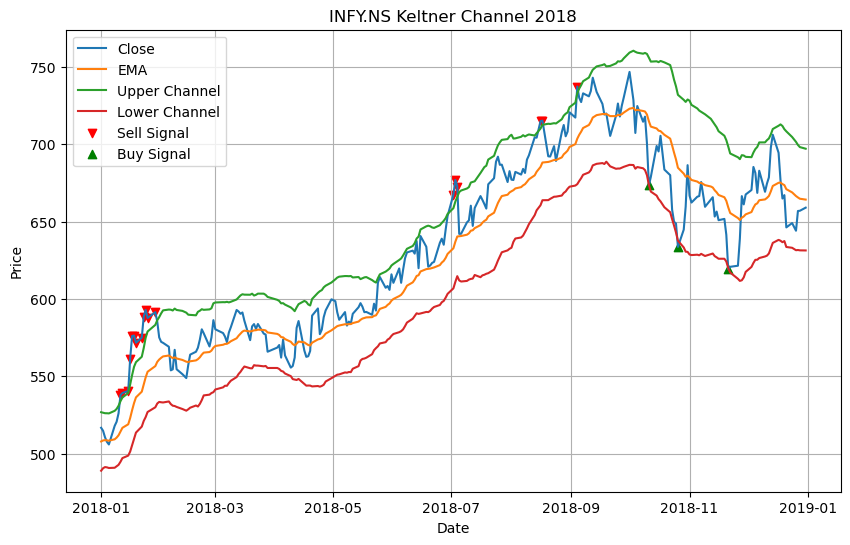

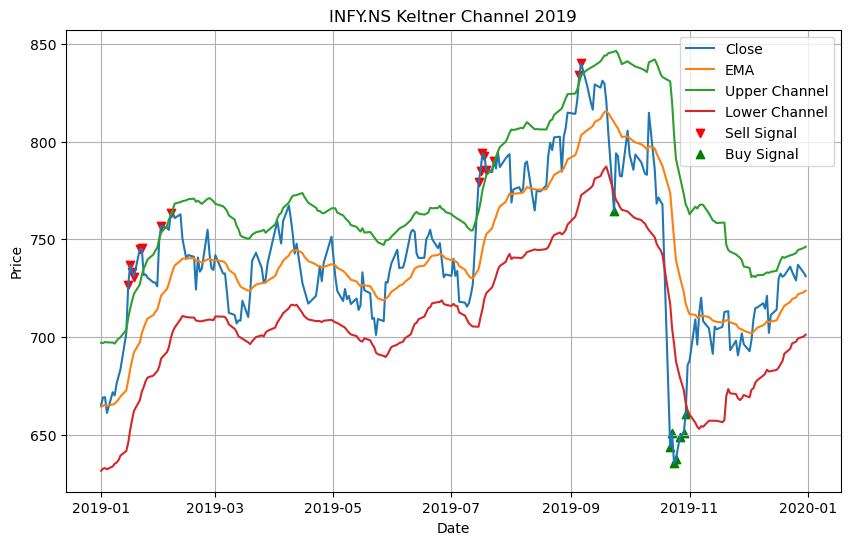

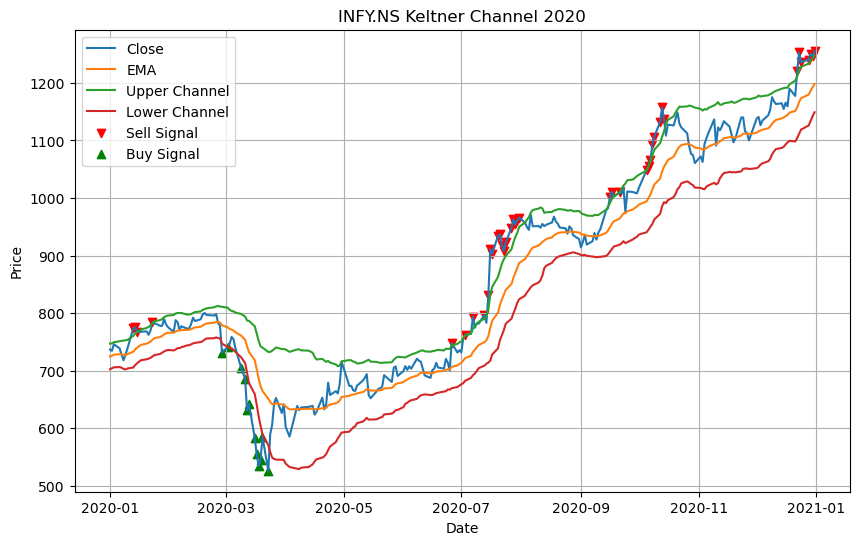

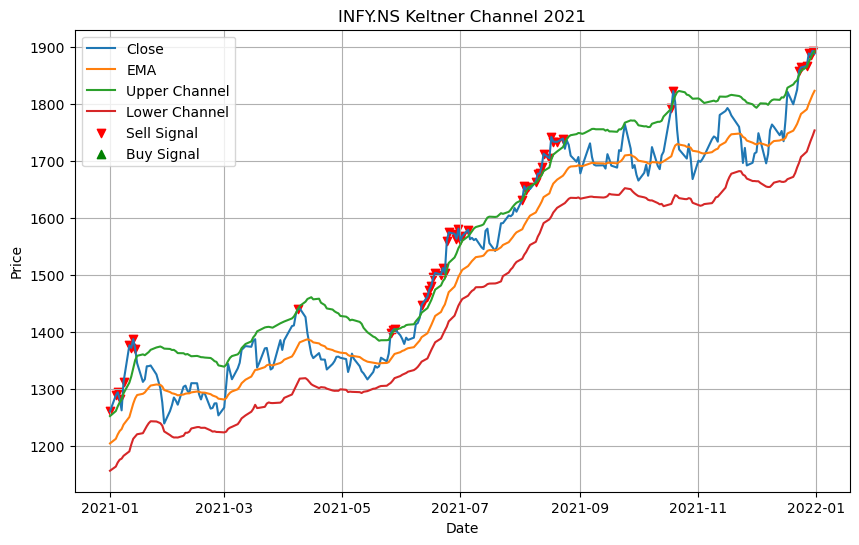

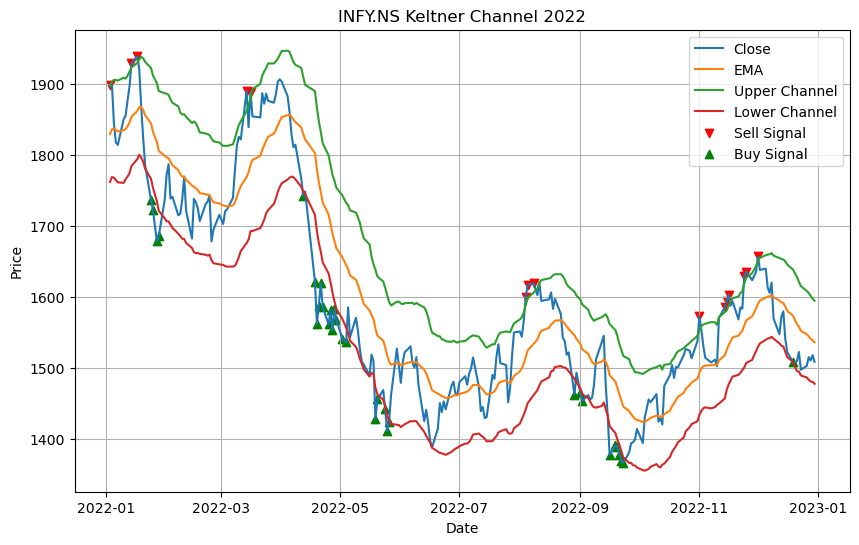

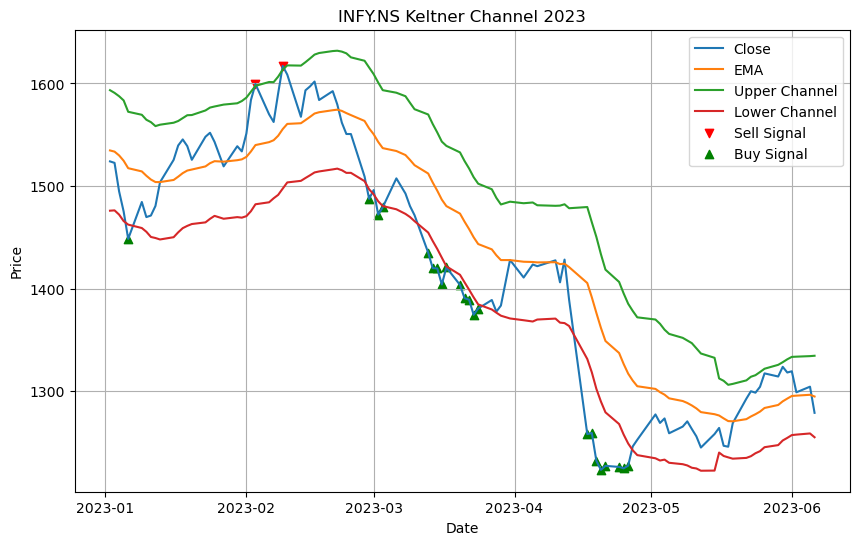

In [416]:
for year in range(start_date.year, end_date.year + 1):
    
    # Filter data for the current year
    year_data = data[data.index.year == year]
    
    
    sell_signals = year_data[year_data['Close'] > year_data["UPPER CHANNEL"]]['Close']
    buy_signals = year_data[year_data['Close'] < year_data["LOWER CHANNEL"]]['Close']




    plt.figure(figsize=(10, 6))
    plt.plot(year_data.index, year_data["Close"], label="Close")
    plt.plot(year_data.index, year_data["EMA"], label="EMA")
    plt.plot(year_data.index, year_data["UPPER CHANNEL"], label="Upper Channel")
    plt.plot(year_data.index, year_data["LOWER CHANNEL"], label="Lower Channel")
    plt.scatter(sell_signals.index, sell_signals, color='red', label='Sell Signal', marker='v')
    plt.scatter(buy_signals.index, buy_signals, color='green', label='Buy Signal', marker='^')
    plt.title(f"{ticker} Keltner Channel {year}")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.grid(True)
    plt.legend()
    plt.show()



In [445]:
import plotly.graph_objects as go
ticker = "INFY.NS"
start_date = datetime(2013, 7, 6)
end_date = datetime(2023, 7, 6)

# Download historical stock price data
df = yf.download(ticker, start=start_date, end=end_date)
import plotly.graph_objects as go
for year in range(start_date.year, end_date.year + 1):
    # Filter data for the current year
    year_data = df[df.index.year == year]
    
    



    fig = go.Figure(data=[go.Candlestick(x=year_data.index,
               open=year_data['Open'],
                high=year_data['High'],
                low=year_data['Low'],
                close=year_data['Close'])])
    # Plotting
    fig.update_layout(
    title=f"{ticker} Stock Price  {year}",
    xaxis=dict(title="Date"),
    yaxis=dict(title="Price")
)
       

    
                                    


    fig.show()


[*********************100%***********************]  1 of 1 completed
